# Health Insurance Cost Prediction Using ML

# Goal

The goal is to predict the charges to pay depending on the columns (age,sex,bmi,children,smoker,region)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv(r"C:\Users\BORN 2 CODE\Downloads\insurance.csv")

In [27]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df.shape

(1338, 7)

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
# statistical info
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Convert the categorical column[sex,smoker,region] to numerical 

In [34]:
df['sex'] = df['sex'].map({'female':0,'male':1})

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [36]:
df['smoker'] = df['smoker'].map({'no':0,'yes':1})

In [37]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Store the feature matrix in X and Responce(Target) in vector y

In [40]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [41]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [42]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train Test split

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Import the Models

In [46]:
#As this is regression problem
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [48]:
#linear Regressoin
lr = LinearRegression()
lr.fit(X_train,y_train)

#SVM
svm = SVR()
svm.fit(X_train,y_train)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

#GrientBoosting
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Predict on the Test Data

In [51]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [52]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.501784,10594.836557,11001.128629
887,5272.17580,7116.295018,9493.253027,5134.925713,5840.174656
890,29330.98315,36909.013521,9648.297116,28203.442431,28001.980112
1293,9301.89355,9507.874691,9555.223014,10724.667365,9745.291602
259,33750.29180,27013.350008,9421.474560,34421.446972,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.419534,47374.968440,45431.423211
575,12222.89830,11814.555568,9625.047904,12654.871678,12465.025294
535,6067.12675,7638.107736,9504.805678,6417.150547,6974.336525
543,63770.42801,40959.081722,9604.855076,46561.566703,47862.047791


# Comparing Performance Visually

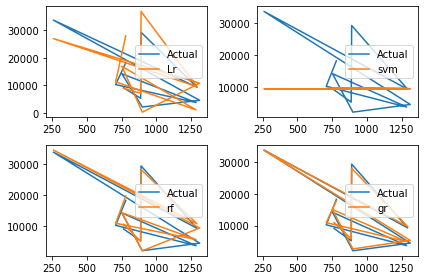

In [56]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

plt.tight_layout()
plt.legend()

Here we see that the model 4 is the best fit.

# Evaluating the Algorithm 

In [57]:
from sklearn import metrics

In [58]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [59]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07230841842488811 0.8630258444946707 0.8779726251291786


In [61]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [62]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.79866979489 2527.033767189615 2447.951558054584


# Predict Charges for New Customer 

In [63]:
data = {'age':40,
         'sex':1,
       'bmi':40.30,
       'childrenn':4,
       'smoker':1,
       'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,childrenn,smoker,region
0,40,1,40.3,4,1,2


In [64]:
new_pred = gr.predict(df)
print(new_pred)

[44148.73403782]


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- childrenn
Feature names seen at fit time, yet now missing:
- children

  warnings.warn(message, FutureWarning)


# Save the model

In [65]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [66]:
import joblib

In [67]:
joblib.dump(gr,'model_joblib_gr')


['model_joblib_gr']

In [68]:
model = joblib.load('model_joblib_gr')

In [71]:
model.predict(df)

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- childrenn
Feature names seen at fit time, yet now missing:
- children

  warnings.warn(message, FutureWarning)


array([43296.46435835])